<a href="https://colab.research.google.com/github/Aya-Aboulwafa/Auto-mpg/blob/main/LR_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!get clone https://github.com/Aya-Aboulwafa/Auto-mpg

/bin/bash: get: command not found


Read data set

In [ ]:
import pandas as pd
df = pd.read_csv("auto-mpg.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

Data preprocessing

In [ ]:
df = df.replace('?', 0)

In [ ]:
df['horsepower'] = pd.to_numeric(df['horsepower']).astype(float)

In [ ]:
df = df.drop('car name', axis=1)

Split features & target

In [ ]:
X= df.iloc[:, 1:]
y= df.iloc[:, :1]

In [ ]:
X

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,1
394,4,97.0,52.0,2130,24.6,82,2
395,4,135.0,84.0,2295,11.6,82,1
396,4,120.0,79.0,2625,18.6,82,1


In [ ]:
y

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


Scalling features of data set

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

Splitting train & testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

Apply Linear Regression model

In [ ]:
from sklearn import linear_model
Reg_model = linear_model.LinearRegression()
Reg_model.fit(X_train, y_train)
y_pred = Reg_model.predict(X_test)

R2 for LR model

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.7866502536981316


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse = mse.astype(int)
mse

15

Correlatin of features

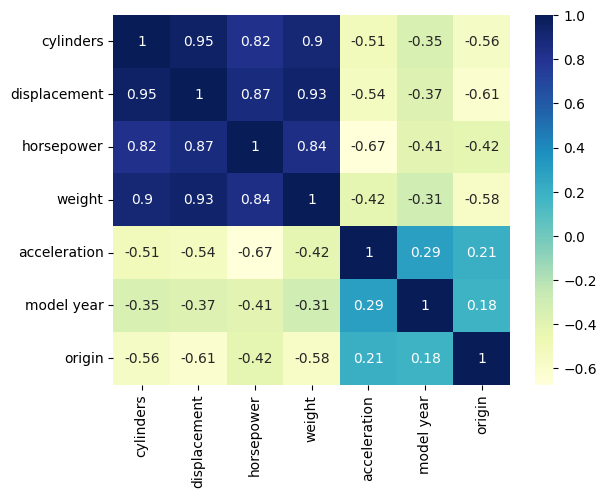

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt


dataplot = sb.heatmap(df.iloc[:, 1:].corr(), cmap="YlGnBu", annot=True)
plt.show()

Splitting X & y after apply PCA

In [ ]:
X= df[["weight","horsepower", "origin"]]
y= df["mpg"]

Scalling features

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

Scalling features

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

Apply LR model after correlation

In [ ]:
from sklearn import linear_model
Reg_model = linear_model.LinearRegression()
Reg_model.fit(X_train, y_train)
y_pred = Reg_model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.7006349838676743


PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca.fit(df)
transformed_data = pca.transform(df)
df_transformed = pd.DataFrame(transformed_data, columns=['PC1', 'PC2','PC3','PC4'])
df_transformed['mpg'] = df['mpg']

In [ ]:
df_transformed.head()

,PC1,PC2,PC3,PC4,mpg
0,543.752091,50.910365,11.862133,-3.115427,18.0
1,737.682562,79.930539,-6.756120,-2.635851,15.0
2,478.304362,76.118681,-3.154694,-2.235279,18.0
3,473.740834,63.410968,-7.892813,-4.103177,16.0
4,488.992376,56.305526,0.740378,-3.715849,17.0


Splitting X & y after apply PCA

In [ ]:
X= df_transformed.iloc[:, :-1]
y= df_transformed.iloc[:, -1:]

Scalling features

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

Splitting train & test

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

Apply LR model after applying PCA

In [ ]:
from sklearn import linear_model
Reg_model = linear_model.LinearRegression()
Reg_model.fit(X_train, y_train)
y_pred = Reg_model.predict(X_test)

Final accuracy of the model

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.9741826620981938
